Expected total play time: 12.0


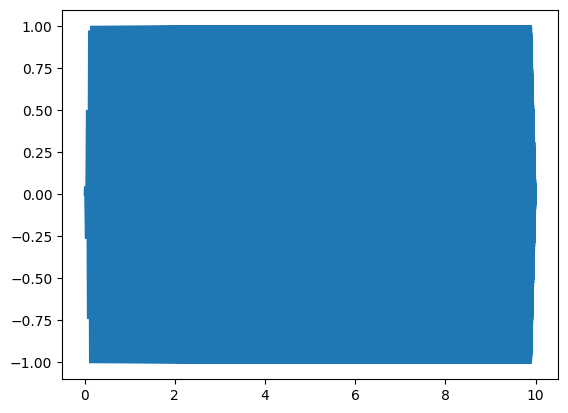

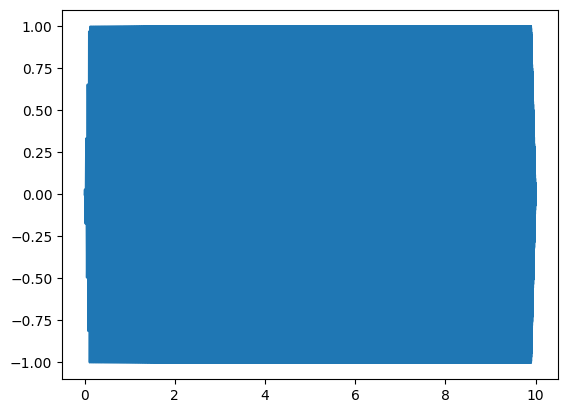

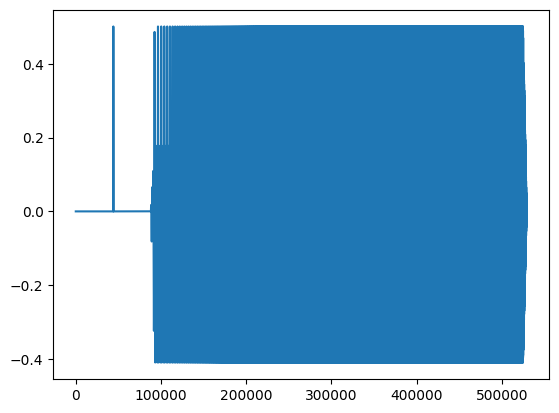

Saved stimulus.wav


In [1]:
from log_sweep import generate_log_sweep
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import sys

from list_audio_devices import SWEEP_DURATION, TIMING_REFERENCE_DURATION, HEADROOM_DB, MIN_TONE, MAX_TONE, RECORDING_SAMPLE_RATE

# Sweep headroom (dB)
headroom = HEADROOM_DB

# Minimum and maximum frequencies for the sweep (Hz)
f_min = MIN_TONE
f_max = MAX_TONE

# Duration of the sweep (seconds)
t = SWEEP_DURATION

# Sampling rate (Hz)
Fs = RECORDING_SAMPLE_RATE

# Length of timing reference (seconds)
timing_reference_time = TIMING_REFERENCE_DURATION

# Ratio between f1 and f2
r = 1.5


# Starting and ending frequencies for the two log sweeps
f1_min = f_min
f1_max = f_max / r
f2_min = f_min * r
f2_max = f_max

# Generate the two log sweeps
log_sweep_f1 = generate_log_sweep(f1=f1_min, f2=f1_max, t=t, Fs=Fs)
log_sweep_f2 = generate_log_sweep(f1=f2_min, f2=f2_max, t=t, Fs=Fs)

# Combine the two sweeps
combined_sweep = (log_sweep_f1 + log_sweep_f2) / 2

# Add timing reference
timing_reference = np.zeros(int(timing_reference_time * Fs))
timing_reference[len(timing_reference) // 2] = 1
combined_sweep = np.concatenate((timing_reference, combined_sweep))

# Add headroom
combined_sweep *= 10 ** (-headroom / 20)

plt.plot(combined_sweep)
plt.show()

# Make stereo
combined_sweep = np.vstack((combined_sweep, combined_sweep)).T

# Write to wav file
file_name = "stimulus.wav"
wav.write(file_name, Fs, combined_sweep)
print(f"Saved {file_name}")

# # Write to wav file
# file_name = "stimulus.wav"
# wav.write(file_name, Fs, combined_sweep)
# print(f"Saved {file_name}")